# Lucas Test for primality

N > 2

In [3]:
from sympy import primefactors as pf
import random 
def lucas(N,k):
    factors = pf(N-1)
    m = len(factors)
    for i in range(k):
        if m != 0:
            a = random.randint(1,N)
            if pow(a,N-1,N) == 1:                       # Condition 1
                for factor in factors:
                    if pow(a,int((N-1)/factor),N) == 1: # Condition 2
                        break
                    else:
                        m = m-1
            if m == 0:
                return 'prime'
    return 'undecided'

In [32]:
lucas(244446464646677,10)

[2, 503, 857, 141766939]

### Running time analysis

### No condition

In [4]:
import matplotlib.pyplot as plt
import time
import math
import random
def analysis1(B,k):
    x = []
    y = []
    for n in range(2,B):
        start = 10**(n)
        end = 10**(n+1)
        st = (end-start)/k
        for i in range(1,k+1):
            L = random.randint(start,start+st)
            start = start+ st
            x.append(L)
            s = time.perf_counter()
            f1 = lucas(L,5)
            e = time.perf_counter()
            y.append(e-s)
    plt.figure(figsize=(20,10))
    plt.title("Execution Time Variation")
    plt.plot(x,y, color = 'b')
    plt.xlabel('values')
    plt.ylabel('Time of Execution(seconds)')
    plt.show()

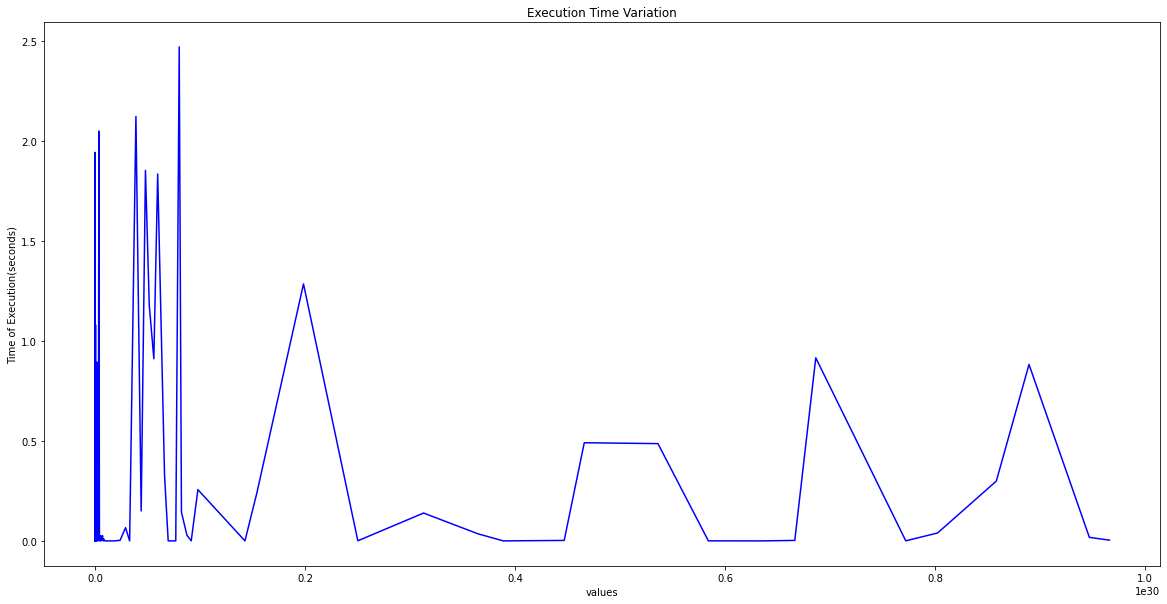

In [5]:
analysis1(30,20)

#### For prime inputs only

In [6]:
import matplotlib.pyplot as plt
import time
import math
def analysis2(B):
    x = []
    y = []
    L_list =[]
    for n in range(2,B):
        start = 10**(n)
        end = 10**(n+1)
        L = random.randint(start,end)
        strt = time.perf_counter()
        luc = lucas(L,5)
        en = time.perf_counter()
        while luc == 'undecided':
            L = random.randint(start,end)
            strt = time.perf_counter()
            luc = lucas(L,5)
            en = time.perf_counter()
        L_list.append(L)
        x.append(n)
        y.append(en-strt)
    plt.figure(figsize=(15,10))
    plt.plot(x,y, color = 'b')
    plt.xlabel('No. of Digits')
    plt.ylabel('Time')
    plt.show()

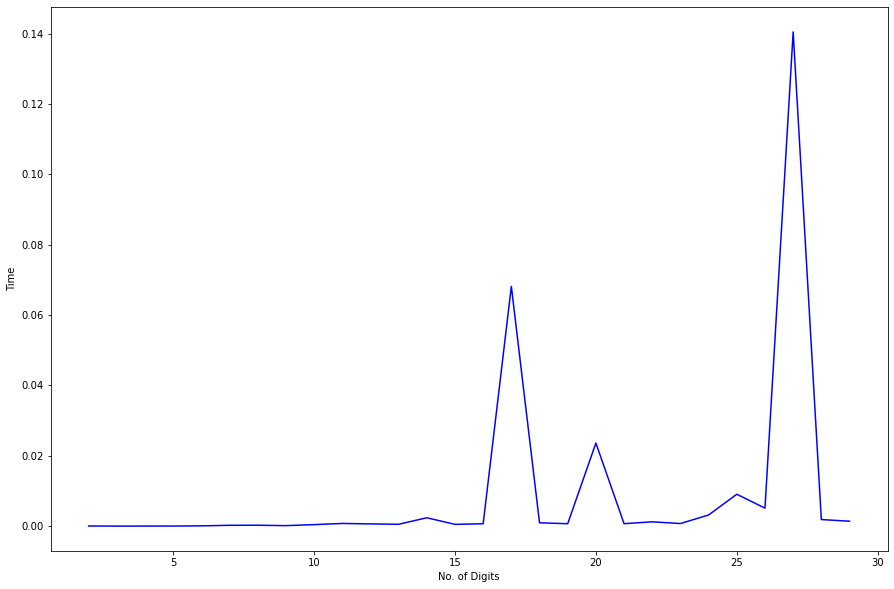

In [8]:
analysis2(30)

### Prime inputs with average time digit-wise

In [9]:
import matplotlib.pyplot as plt
import sympy as sp
import time
import math
import random
def analysis3(B,k):
    x = []
    y = []
    for n in range(2,B):
        start = 10**(n)
        end = 10**(n+1)
        st = (end-start)/k
        time_list  = []
        for i in range(1,k+1):
            L = random.randint(int(start),int(start+st))
            while sp.isprime(L) == False:
                L = random.randint(int(start),int(start+st))
            start = start+st
            s = time.perf_counter()
            luc = lucas(L,5)
            e = time.perf_counter()
            time_list.append(e-s)
        tim = sum(time_list)/len(time_list)
        x.append(n)
        y.append(tim)
    plt.figure(figsize=(20,10))
    plt.title("Running Time Variation")
    plt.plot(x,y, color = 'b')
    plt.xlabel('No. of Digits')
    plt.ylabel('Running Time (seconds)')
    plt.show()

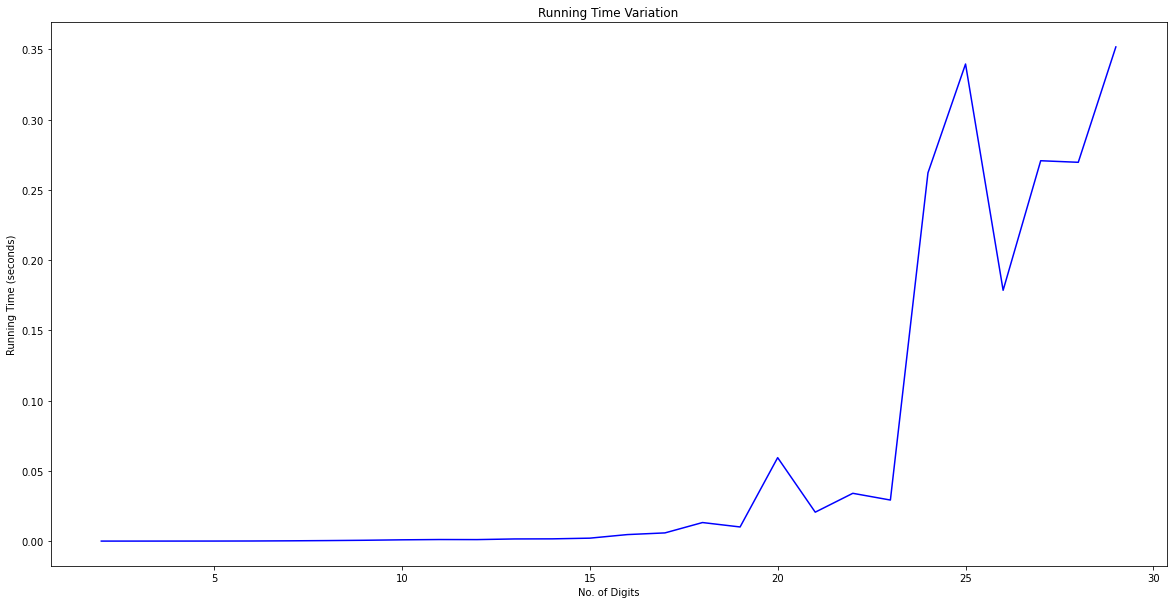

In [10]:
analysis3(30,50)